# Quantum contextuality

## Peres-Mermin Square

In [1]:
from qiskit import *
import numpy as np
from matplotlib import pyplot as plt

Two-state mapping to qutrit states

Consider the following object

$$\left[\begin{array}{ccc} \hat{A} & \hat{B} & \hat{C}\\ \hat{a} & \hat{b} & \hat{c}\\ \hat{\alpha} & \hat{\beta} & \hat{\gamma}\end{array}\right]$$

Each quantity corresponds to some dichotomic measurement (always $\pm 1$). It is assumed each element commutes with every other element in its row and column but not necessarily with other objects. We say each row (and each column) forms a "context." Clearly, due to commutations, we can simultaneously define values for objects within a context since commuting observables imply simultaneous eigenstates. Classically, each of these nine objects has a well-defined value independently of whether or not it is measured. Suppose each quantity is assigned a value of 1 and consider the six products

$$ABC, abc, \alpha\beta\gamma, Aa\alpha, Bb\beta, Cc\gamma$$

We observe that for arbitrary values of $A, \cdots, \gamma$, only an even number of these terms can be positive since changing one will flip the sign of two terms. Let $\mathcal{M} = ABC+ abc+ \alpha\beta\gamma+ Aa\alpha+ Bb\beta-Cc\gamma$. Then it follows we have $|\mathcal{M}|\leq 4$. Classically, we could just enumerate the $2^{9}$ possibilities. In fact, one can show that $\mathcal{M}\in\left\{-4,0,4\right\}$. Considering some averaging of dichotomic measurements, it follows that

$$\langle \mathcal{M} \rangle = \langle ABC\rangle+ \langle abc\rangle+ \langle\alpha\beta\gamma\rangle+ \langle Aa\alpha\rangle+ \langle Bb\beta\rangle-\langle Cc\gamma\rangle \leq 4$$

In [11]:
M = np.zeros(2**9)
s = 0

for i in range(0,2):
    for j in range(0,2):
        for k in range(0,2):
            for l in range(0,2):
                for m in range(0,2):
                    for n in range(0,2):
                        for p in range(0,2):
                            for q in range(0,2):
                                for r in range(0,2):
                                    
                                    A = (-1)**i
                                    B = (-1)**j
                                    C = (-1)**k
                                    
                                    a = (-1)**l
                                    b = (-1)**m
                                    c = (-1)**n
                                    
                                    α = (-1)**p
                                    β = (-1)**q
                                    γ = (-1)**r
                                    
                                    M[s] = A*B*C + a*b*c + α*β*γ + A*a*α + B*b*β - C*c*γ
                                    s = s + 1

M = np.unique(M)

print(M)

[-4.  0.  4.]


Quantum mechanically, the situation is more subtle. A set of operators which satisfies this commutation structure is

$$\left[\begin{array}{ccc} \hat{A} & \hat{B} & \hat{C}\\ \hat{a} & \hat{b} & \hat{c}\\ \hat{\alpha} & \hat{\beta} & \hat{\gamma}\end{array}\right] = \left[\begin{array}{ccc} \hat{\sigma}^{z}\otimes\hat{I} & \hat{I}\otimes\hat{\sigma}^{z} & \hat{\sigma}^{z}\otimes\hat{\sigma}^{z}\\ \hat{I}\otimes\hat{\sigma}^{x} & \hat{\sigma}^{x}\otimes\hat{I} & \hat{\sigma}^{x}\otimes\hat{\sigma}^{x}\\ \hat{\sigma}^{z}\otimes\hat{\sigma}^{x} & \hat{\sigma}^{x}\otimes\hat{\sigma}^{z} & \hat{\sigma}^{y}\otimes\hat{\sigma}^{y}\end{array}\right]$$

Most of the commutators can be verified by inspection, but it's simple enough to use Qiskit to check them.

In [12]:
from qiskit.quantum_info import SparsePauliOp

A = SparsePauliOp.from_list([("ZI", 1.0)])
B = SparsePauliOp.from_list([("IZ", 1.0)])
C = SparsePauliOp.from_list([("ZZ", 1.0)])

a = SparsePauliOp.from_list([("IX", 1.0)])
b = SparsePauliOp.from_list([("XI", 1.0)])
c = SparsePauliOp.from_list([("XX", 1.0)])

α = SparsePauliOp.from_list([("ZX", 1.0)])
β = SparsePauliOp.from_list([("XZ", 1.0)])
γ = SparsePauliOp.from_list([("YY", 1.0)])

For example:

In [18]:
SparsePauliOp.simplify(α @ γ - γ @ α)

SparsePauliOp(['II'],
              coeffs=[0.+0.j])

In [19]:
SparsePauliOp.simplify(C @ c - c @ C)

SparsePauliOp(['II'],
              coeffs=[0.+0.j])

But objects from different contexts do not commute. For example

In [20]:
SparsePauliOp.simplify(A @ γ - γ @ A)

SparsePauliOp(['XY'],
              coeffs=[0.-2.j])

Returning to the question of $\mathcal{M}$, we can simplify the operators as follows.

In [22]:
SparsePauliOp.simplify(A @ a @ α)

SparsePauliOp(['II'],
              coeffs=[1.+0.j])

In [23]:
SparsePauliOp.simplify(B @ b @ β)

SparsePauliOp(['II'],
              coeffs=[1.+0.j])

In [24]:
SparsePauliOp.simplify(C @ c @ γ)

SparsePauliOp(['II'],
              coeffs=[-1.-0.j])

In [25]:
SparsePauliOp.simplify(A @ B @ C)

SparsePauliOp(['II'],
              coeffs=[1.+0.j])

In [26]:
SparsePauliOp.simplify(B @ b @ β)

SparsePauliOp(['II'],
              coeffs=[1.+0.j])

In [27]:
SparsePauliOp.simplify(C @ c @ γ)

SparsePauliOp(['II'],
              coeffs=[-1.-0.j])

In other words, for <i>any</i> quantum state, 

$$\langle \Psi | \hat{\mathcal{M}}|\Psi\rangle = \langle \Psi | \left[\hat{A}\hat{B}\hat{C} + \hat{a}\hat{b}\hat{c} +\hat{\alpha}\hat{\beta}\hat{\gamma} + \hat{A}\hat{a}\hat{\alpha} + \hat{B}\hat{b}\hat{\beta} - \hat{C}\hat{c}\hat{\gamma}\right]|\Psi\rangle = \langle \Psi| 6\hat{I} |\Psi\rangle = 6$$

That's a <i>clear</i> violation of the basic inequality based on classical non-contextuality. 

Let's try measuring each of the six terms with a circuit for some specified initial state. This illuminates a potential point of confusion regarding what we're trying to measure. That is, let's measure each of the nine operators by measuring <i>both</i> qubits individually and see what happens.

$\hat{A}\hat{B}\hat{C}$

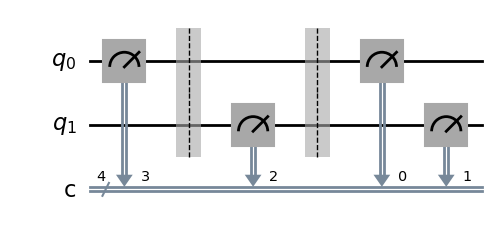

In [130]:
circs = []

qr = QuantumRegister(2,'q')
cr = ClassicalRegister(4,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.measure(0,3)
circ.barrier()

#O2
circ.measure(1,2)
circ.barrier()

#O3
circ.measure([0,1],[0,1])

circs.append(circ)

circ.draw('mpl')

$\hat{a}\hat{b}\hat{c}$

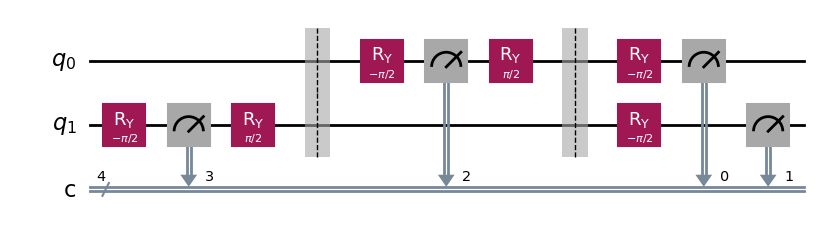

In [131]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(4,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.ry(-np.pi/2,1)
circ.measure(1,3)
circ.ry(np.pi/2,1)
circ.barrier()

#O2
circ.ry(-np.pi/2,0)
circ.measure(0,2)
circ.ry(np.pi/2,0)
circ.barrier()

#O3
circ.ry(-np.pi/2,0)
circ.ry(-np.pi/2,1)
circ.measure([0,1],[0,1])

circs.append(circ)

circ.draw('mpl')

$\hat{\alpha}\hat{\beta}\hat{\gamma}$

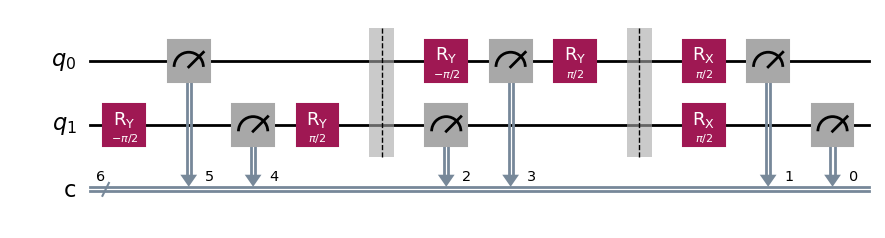

In [132]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(6,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.ry(-np.pi/2,1)
circ.measure(0,5)
circ.measure(1,4)
circ.ry(np.pi/2,1)
circ.barrier()

#O2
circ.ry(-np.pi/2,0)
circ.measure(0,3)
circ.measure(1,2)
circ.ry(np.pi/2,0)
circ.barrier()

#O3
circ.rx(np.pi/2,0)
circ.rx(np.pi/2,1)
circ.measure([0,1],[0,1])

circs.append(circ)

circ.draw('mpl')

$\hat{A}\hat{a}\hat{\alpha}$

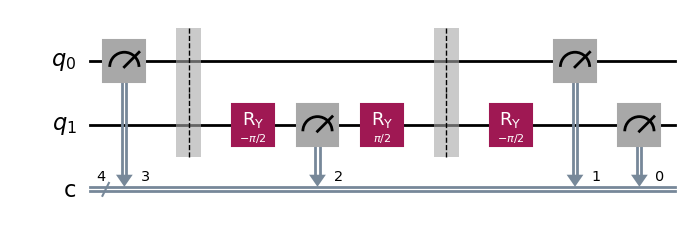

In [133]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(4,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.measure(0,3)
circ.barrier()

#O2
circ.ry(-np.pi/2,1)
circ.measure(1,2)
circ.ry(np.pi/2,1)
circ.barrier()

#O3
circ.ry(-np.pi/2,1)
circ.measure([0,1],[0,1])

circs.append(circ)

circ.draw('mpl')

$\hat{B}\hat{b}\hat{\beta}$

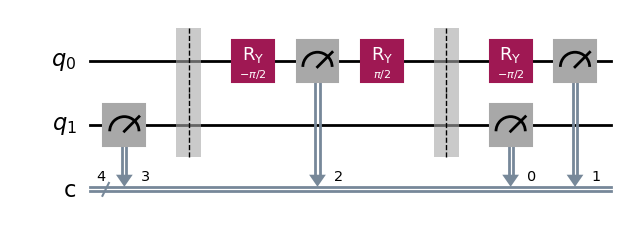

In [134]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(4,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.measure(1,3)
circ.barrier()

#O2
circ.ry(-np.pi/2,0)
circ.measure(0,2)
circ.ry(np.pi/2,0)
circ.barrier()

#O3
circ.ry(-np.pi/2,0)
circ.measure([0,1],[0,1])

circs.append(circ)

circ.draw('mpl')

$\hat{C}\hat{c}\hat{\gamma}$

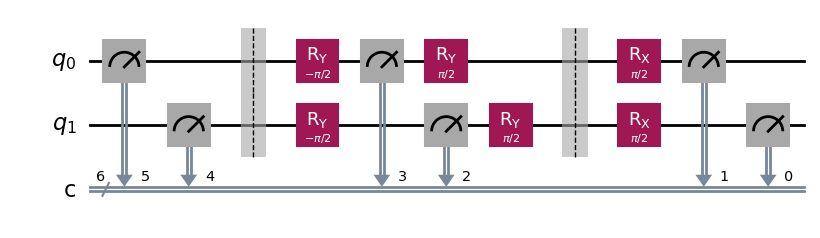

In [135]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(6,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.measure([0,1],[5,4])
circ.barrier()

#O2
circ.ry(-np.pi/2,0)
circ.ry(-np.pi/2,1)
circ.measure([0,1],[3,2])
circ.ry(np.pi/2,0)
circ.ry(np.pi/2,1)
circ.barrier()

#O3
circ.rx(np.pi/2,0)
circ.rx(np.pi/2,1)
circ.measure([0,1],[0,1])

circs.append(circ)

circ.draw('mpl')

In [147]:
nshots = 8192

from qiskit_aer import AerSimulator

simulator = AerSimulator()
compiled_circuit = transpile(circs, simulator)
sim_result = simulator.run(compiled_circuit,shots=nshots).result()
counts = sim_result.get_counts()

In [148]:
measured_counts = counts[0]
k = list(measured_counts.keys())

ABC = 0

for i in range(0,len(k)):
    state = k[i]

    A = (-1.0)**float(state[0])
    B = (-1.0)**float(state[1])
    C = ((-1.0)**float(state[2]))*((-1.0)**float(state[3]))
    
    ABC = ABC + A*B*C*measured_counts[state]

ABC = ABC/nshots

In [149]:
measured_counts = counts[1]
k = list(measured_counts.keys())

abc = 0

for i in range(0,len(k)):
    state = k[i]

    a = (-1.0)**float(state[0])
    b = (-1.0)**float(state[1])
    c = ((-1.0)**float(state[2]))*((-1.0)**float(state[3]))
    abc = abc + a*b*c*measured_counts[state]

abc = abc/nshots

In [150]:
measured_counts = counts[2]
k = list(measured_counts.keys())

αβγ = 0

for i in range(0,len(k)):
    state = k[i]

    α = ((-1.0)**float(state[0]))*((-1.0)**float(state[1]))
    β = ((-1.0)**float(state[2]))*((-1.0)**float(state[3]))
    γ = ((-1.0)**float(state[4]))*((-1.0)**float(state[5]))
    
    αβγ = αβγ + α*β*γ*measured_counts[state]

αβγ = αβγ/nshots

In [151]:
measured_counts = counts[3]
k = list(measured_counts.keys())

Aaα = 0

for i in range(0,len(k)):
    state = k[i]

    A = (-1.0)**float(state[0])
    a = (-1.0)**float(state[1])
    α = ((-1.0)**float(state[2]))*((-1.0)**float(state[3]))
    
    Aaα = Aaα + A*a*α*measured_counts[state]

Aaα = Aaα/nshots

In [152]:
measured_counts = counts[4]
k = list(measured_counts.keys())

Bbβ = 0

for i in range(0,len(k)):
    state = k[i]

    B = (-1.0)**float(state[0])
    b = (-1.0)**float(state[1])
    β = ((-1.0)**float(state[2]))*((-1.0)**float(state[3]))
    
    Bbβ = Bbβ + B*b*β*measured_counts[state]

Bbβ = Bbβ/nshots

In [153]:
measured_counts = counts[5]
k = list(measured_counts.keys())

Ccγ = 0

for i in range(0,len(k)):
    state = k[i]

    C = ((-1.0)**float(state[0]))*((-1.0)**float(state[1]))
    c = ((-1.0)**float(state[2]))*((-1.0)**float(state[3]))
    γ = ((-1.0)**float(state[4]))*((-1.0)**float(state[5]))
    
    Ccγ = Ccγ + C*c*γ*measured_counts[state]

Ccγ = Ccγ/nshots

In [154]:
print(ABC)
print(abc)
print(αβγ)
print(Aaα)
print(Bbβ)
print(Ccγ)

1.0
1.0
-0.01318359375
1.0
1.0
0.001953125


As noted in the review article, this doesn't work, at least for the bottom row and last column. In those cases, the "fundamental" measurements all involve tensor products of single-spin operators. At the single-qubit levels, these operators don't commute (as the spin-identity combos <i>do</i> in the other contexts). So we can be a little sloppy with the other ones without issue, but we have to figure out a way to treat the objects $\hat{\alpha}$, $\hat{\beta}$, $\hat{\gamma}$, $\hat{C}$, $\hat{c}$ as <i>fundamental</i> and only measure these values (rather than the detailed information about the individual qubits.

In other words, we can't measure a single operator by resorting to two single-qubit measurements to extract the sign. We're asking for <i>too much</i> information to maintain the coherence of the contexts. 

The basic idea is to apply some sort of unitary transformation to convert what we're representing as a two-qubit measurement (of which we only care about the overall sign) into an actual single qubit measurement. For example

$$\hat{C} = \hat{\sigma}^{z}\otimes\hat{\sigma}^{z} = \hat{U}_{C}^{\dagger}\left[\hat{\sigma}^{z}\otimes\hat{I}\right]\hat{U}_{C}$$

This is already the <i>kind</i> of thing we've done at the single-qubit level to measure things like $\hat{\sigma}^{x}$. In that we case, we "rotate" the system in such a way to represent an actual measurement of $\hat{\sigma}^{x}$ by an effective measurement of $\hat{\sigma}^{z}$. But now we need a two-qubit version of this. This looks potentially daunting, as the general two-qubit unitary is <i>much</i> more complicated (well, it involves a lot more than three parameters). So let's look at what we actually need. For the case of $\hat{C} = \hat{\sigma}^{z}\otimes\hat{\sigma}^{z}$, we need to ascertain the value of $C = \pm 1$ but without uncovering the detailed single-qubit states. Starting from $\hat{C}$, we can get $+1$ if the state is $|00\rangle$ (both positive) or $|11\rangle$ (both negative). The cases $|10\rangle$ and $|01\rangle$ have one negative value and result in $C=1$. If we want to perform some transformation to represent this measurement effectively by a single measurement of the first qubit, the easiest appropriate mapping we need from this transformation is 

$$|00\rangle \rightarrow |00\rangle$$
$$|11\rangle \rightarrow |01\rangle$$
$$|10\rangle \rightarrow |10\rangle$$
$$|01\rangle \rightarrow |11\rangle$$

In this way, the overall sign of $C$ is encoded in that first qubit. We don't scoop out all of the system's information since the second qubit would remain in a superposition state if it were in such a state before meausurement. In the previous version, that superposition was not maintained when measuring other operators. I say "simplest" because we're mapping $|00\rangle$ and $|10\rangle$ to themselves, but we could do something more complicated. Why make it harder?

Well, we're actually in luck because that mapping is accomplished by the basic CNOT gate with the first qubit being the target and the second being the control. That's it. In general, we could decompose <i>any</i> two-qubit (or bigger, even) unitary operation into a combination of CNOT and single-qubit unitaries. But here, it's particularly simple. That's nice.

For other things like $\hat{\sigma}^{x}\otimes\hat{\sigma}^{z}$ or $\hat{\sigma}^{y}\otimes\hat{\sigma}^{y}$, we just have to use rotation gates to first transform them to $\hat{\sigma}^{z}\otimes\hat{\sigma}^{z}$ (like before) and then use the CNOT trick. CNOT is its own inverse, so this whole ordeal should be pretty simple to implement. Let's try again. 

$\hat{A}\hat{B}\hat{C}$

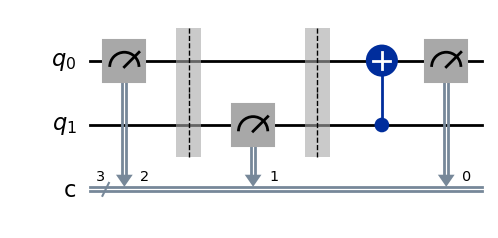

In [155]:
circs = []

qr = QuantumRegister(2,'q')
cr = ClassicalRegister(3,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.measure(0,2)
circ.barrier()

#O2
circ.measure(1,1)
circ.barrier()

#O3
circ.cx(1,0)
circ.measure(0,0)

circs.append(circ)

circ.draw('mpl')

$\hat{a}\hat{b}\hat{c}$

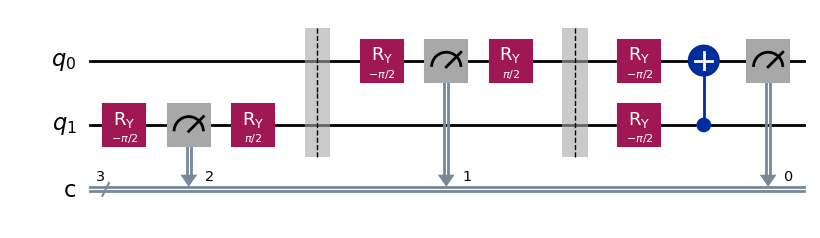

In [156]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(3,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.ry(-np.pi/2,1)
circ.measure(1,2)
circ.ry(np.pi/2,1)
circ.barrier()

#O2
circ.ry(-np.pi/2,0)
circ.measure(0,1)
circ.ry(np.pi/2,0)
circ.barrier()

#O3
circ.ry(-np.pi/2,0)
circ.ry(-np.pi/2,1)
circ.cx(1,0)
circ.measure(0,0)

circs.append(circ)

circ.draw('mpl')

$\hat{\alpha}\hat{\beta}\hat{\gamma}$

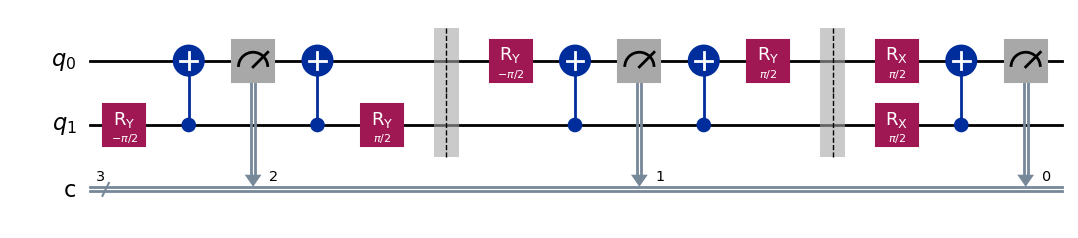

In [157]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(3,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.ry(-np.pi/2,1)
circ.cx(1,0)
circ.measure(0,2)
circ.cx(1,0)
circ.ry(np.pi/2,1)
circ.barrier()

#O2
circ.ry(-np.pi/2,0)
circ.cx(1,0)
circ.measure(0,1)
circ.cx(1,0)
circ.ry(np.pi/2,0)
circ.barrier()

#O3
circ.rx(np.pi/2,0)
circ.rx(np.pi/2,1)
circ.cx(1,0)
circ.measure(0,0)

circs.append(circ)

circ.draw('mpl')

$\hat{A}\hat{a}\hat{\alpha}$

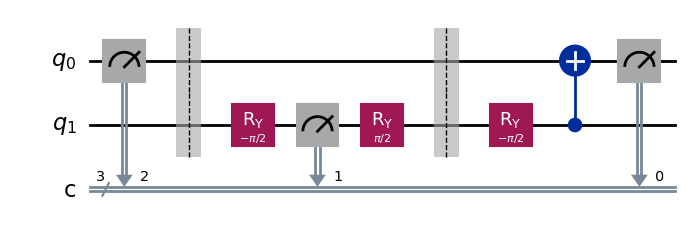

In [160]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(3,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.measure(0,2)
circ.barrier()

#O2
circ.ry(-np.pi/2,1)
circ.measure(1,1)
circ.ry(np.pi/2,1)
circ.barrier()

#O3
circ.ry(-np.pi/2,1)
circ.cx(1,0)
circ.measure(0,0)

circs.append(circ)

circ.draw('mpl')

$\hat{B}\hat{b}\hat{\beta}$

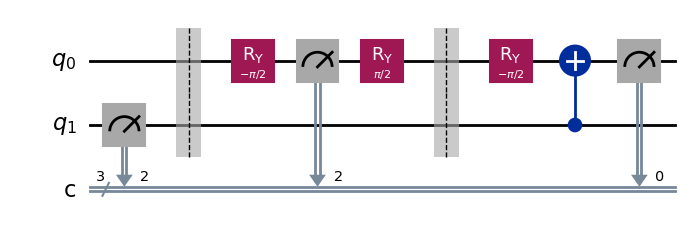

In [161]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(3,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.measure(1,2)
circ.barrier()

#O2
circ.ry(-np.pi/2,0)
circ.measure(0,2)
circ.ry(np.pi/2,0)
circ.barrier()

#O3
circ.ry(-np.pi/2,0)
circ.cx(1,0)
circ.measure(0,0)

circs.append(circ)

circ.draw('mpl')

$\hat{C}\hat{c}\hat{\gamma}$

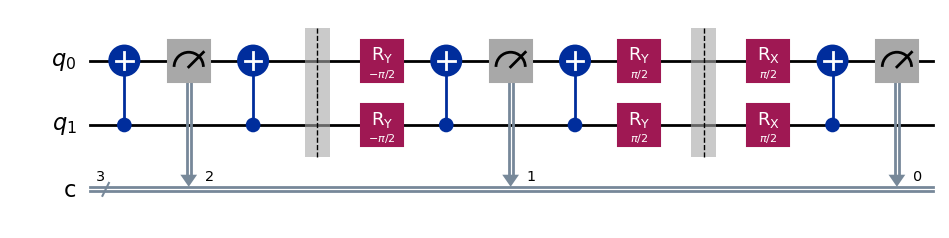

In [162]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(3,'c')
circ = QuantumCircuit(qr,cr)

#O1
circ.cx(1,0)
circ.measure(0,2)
circ.cx(1,0)
circ.barrier()

#O2
circ.ry(-np.pi/2,0)
circ.ry(-np.pi/2,1)
circ.cx(1,0)
circ.measure(0,1)
circ.cx(1,0)
circ.ry(np.pi/2,0)
circ.ry(np.pi/2,1)
circ.barrier()

#O3
circ.rx(np.pi/2,0)
circ.rx(np.pi/2,1)
circ.cx(1,0)
circ.measure(0,0)

circs.append(circ)

circ.draw('mpl')

In [164]:
nshots = 8192

from qiskit_aer import AerSimulator

simulator = AerSimulator()
compiled_circuit = transpile(circs, simulator)
sim_result = simulator.run(compiled_circuit,shots=nshots).result()
counts = sim_result.get_counts()

In [165]:
measured_counts = counts[0]
k = list(measured_counts.keys())

ABC = 0

for i in range(0,len(k)):
    state = k[i]

    A = (-1.0)**float(state[0])
    B = (-1.0)**float(state[1])
    C = (-1.0)**float(state[2])
    
    ABC = ABC + A*B*C*measured_counts[state]

ABC = ABC/nshots

In [174]:
measured_counts = counts[1]
k = list(measured_counts.keys())

abc = 0

for i in range(0,len(k)):
    state = k[i]

    a = (-1.0)**float(state[0])
    b = (-1.0)**float(state[1])
    c = (-1.0)**float(state[2])
    
    abc = abc + a*b*c*measured_counts[state]

abc = abc/nshots

In [172]:
measured_counts = counts[2]
k = list(measured_counts.keys())

αβγ = 0

for i in range(0,len(k)):
    state = k[i]

    α = (-1.0)**float(state[0])
    β = (-1.0)**float(state[1])
    γ = (-1.0)**float(state[2])
    
    αβγ = αβγ + α*β*γ*measured_counts[state]

αβγ = αβγ/nshots

In [176]:
measured_counts = counts[3]
k = list(measured_counts.keys())

Aaα = 0

for i in range(0,len(k)):
    state = k[i]

    A = (-1.0)**float(state[0])
    a = (-1.0)**float(state[1])
    α = (-1.0)**float(state[2])
    
    Aaα = Aaα + A*a*α*measured_counts[state]

Aaα = Aaα/nshots

In [177]:
measured_counts = counts[4]
k = list(measured_counts.keys())

Bbβ = 0

for i in range(0,len(k)):
    state = k[i]

    B = (-1.0)**float(state[0])
    b = (-1.0)**float(state[1])
    β = (-1.0)**float(state[2])
    
    Bbβ = Bbβ + B*b*β*measured_counts[state]

Bbβ = Bbβ/nshots

In [178]:
measured_counts = counts[5]
k = list(measured_counts.keys())

Ccγ = 0

for i in range(0,len(k)):
    state = k[i]

    C = (-1.0)**float(state[0])
    c = (-1.0)**float(state[1])
    γ = (-1.0)**float(state[2])
    
    Ccγ = Ccγ + C*c*γ*measured_counts[state]

Ccγ = Ccγ/nshots

In [180]:
print(ABC)
print(abc)
print(αβγ)
print(Aaα)
print(Bbβ)
print(Ccγ)
print(ABC+abc+αβγ+Aaα+Bbβ-Ccγ)

1.0
1.0
1.0
1.0
1.0
-1.0
6.0


## Version Information 

In [181]:
import qiskit 

qiskit.version.get_version_info()

'1.1.1'

In [182]:
import qiskit_ibm_runtime

qiskit_ibm_runtime.version.get_version_info()

'0.25.0'